In [2]:
require(plotly)
require(ggplot2)
require(gridExtra)

In [3]:
options(repr.matrix.max.rows = 1000)
options(repr.matrix.max.cols = 30)
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=16, repr.plot.height=8)

In [51]:
seriesFolder = 'data'
modelFolder  = 'model'
resultFolder = 'testResult'
imagesFolder = 'images'

In [52]:
modelsLake = list.files(path = modelFolder, pattern = NULL, all.files = FALSE, full.names = TRUE, recursive = FALSE)
listResult = list()

In [53]:
modelsLake[grepl('forcedec', modelsLake)]

[1] "model/forcedec_01.RData"     "model/forcedec_02.RData"    
  [3] "model/forcedec_03.RData"     "model/forcedec_04.RData"    
  [5] "model/forcedec_05.RData"     "model/forcedec_06.RData"    
  [7] "model/forcedec_07.RData"     "model/forcedec_08.RData"    
  [9] "model/forcedec_09.RData"     "model/forcedec_10.RData"    
 [11] "model/forcedec_11.RData"     "model/forcedec_12.RData"    
 [13] "model/forcedec_13.RData"     "model/forcedec_14.RData"    
 [15] "model/forcedec_15.RData"     "model/forcedec_16.RData"    
 [17] "model/forcedec_17.RData"     "model/forcedec_18.RData"    
 [19] "model/forcedec_19.RData"     "model/forcedec_20.RData"    
 [21] "model/forcedec_21.RData"     "model/forcedec_22.RData"    
 [23] "model/forcedec_23.RData"     "model/forcedec_24.RData"    
 [25] "model/forcedec_25.RData"     "model/forcedec_26.RData"    
 [27] "model/forcedec_27.RData"     "model/forcedec_28.RData"    
 [29] "model/forcedec_29.RData"     "model/forcedec_30.RData"    
 [31] "model/forcedec_31.RData"     "model/forcedec_32.RData"    
 [33] "model/forcedec_33.RData"     "model/forcedec_34.RData"    
 [35] "model/forcedec_35.RData"     "model/forcedec_36.RData"    
 [37] "model/forcedec_37.RData"     "model/forcedec_38.RData"    
 [39] "model/forcedec_39.RData"     "model/forcedec_40.RData"    
 [41] "model/forcedec_41.RData"     "model/forcedec_42.RData"    
 [43] "model/forcedec_43.RData"     "model/forcedec_44.RData"    
 [45] "model/forcedec_45.RData"     "model/forcedec_46.RData"    
 [47] "model/forcedec_47.RData"     "model/forcedec_48.RData"    
 [49] "model/forcedec_49.RData"     "model/forcedec_50.RData"    
 [51] "model/forcedec_51.RData"     "model/forcedec_52.RData"    
 [53] "model/forcedec_53.RData"     "model/forcedec_54.RData"    
 [55] "model/forcedec_55.RData"     "model/forcedectopo_01.RData"
 [57] "model/forcedectopo_02.RData" "model/forcedectopo_03.RData"
 [59] "model/forcedectopo_04.RData" "model/forcedectopo_05.RData"
 [61] "model/forcedectopo_06.RData" "model/forcedectopo_07.RData"
 [63] "model/forcedectopo_08.RData" "model/forcedectopo_09.RData"
 [65] "model/forcedectopo_10.RData" "model/forcedectopo_11.RData"
 [67] "model/forcedectopo_12.RData" "model/forcedectopo_13.RData"
 [69] "model/forcedectopo_14.RData" "model/forcedectopo_15.RData"
 [71] "model/forcedectopo_16.RData" "model/forcedectopo_17.RData"
 [73] "model/forcedectopo_18.RData" "model/forcedectopo_19.RData"
 [75] "model/forcedectopo_20.RData" "model/forcedectopo_21.RData"
 [77] "model/forcedectopo_22.RData" "model/forcedectopo_23.RData"
 [79] "model/forcedectopo_24.RData" "model/forcedectopo_25.RData"
 [81] "model/forcedectopo_26.RData" "model/forcedectopo_27.RData"
 [83] "model/forcedectopo_28.RData" "model/forcedectopo_29.RData"
 [85] "model/forcedectopo_30.RData" "model/forcedectopo_31.RData"
 [87] "model/forcedectopo_32.RData" "model/forcedectopo_33.RData"
 [89] "model/forcedectopo_34.RData" "model/forcedectopo_35.RData"
 [91] "model/forcedectopo_36.RData" "model/forcedectopo_37.RData"
 [93] "model/forcedectopo_38.RData" "model/forcedectopo_39.RData"
 [95] "model/forcedectopo_40.RData" "model/forcedectopo_41.RData"
 [97] "model/forcedectopo_42.RData" "model/forcedectopo_43.RData"
 [99] "model/forcedectopo_44.RData" "model/forcedectopo_45.RData"
[101] "model/forcedectopo_46.RData" "model/forcedectopo_47.RData"
[103] "model/forcedectopo_48.RData" "model/forcedectopo_49.RData"
[105] "model/forcedectopo_50.RData" "model/forcedectopo_51.RData"
[107] "model/forcedectopo_52.RData" "model/forcedectopo_53.RData"
[109] "model/forcedectopo_54.RData" "model/forcedectopo_55.RData"

In [54]:
modelsName = c("fourier_", "wavelet_", "ssa_", "emdrp_", 
               #"emdmi_", 
               "forcedec_", "forcedectopo_")
for(i in 1:length(modelsName)){
    models = modelsLake[grepl(modelsName[i], modelsLake)]
    testData = data.frame()
    for(j in 1:length(models)){
        load(models[j])
        testData = rbind(testData, model$eval)
    }
    listResult[[i]] = testData
}

pdf 
  2

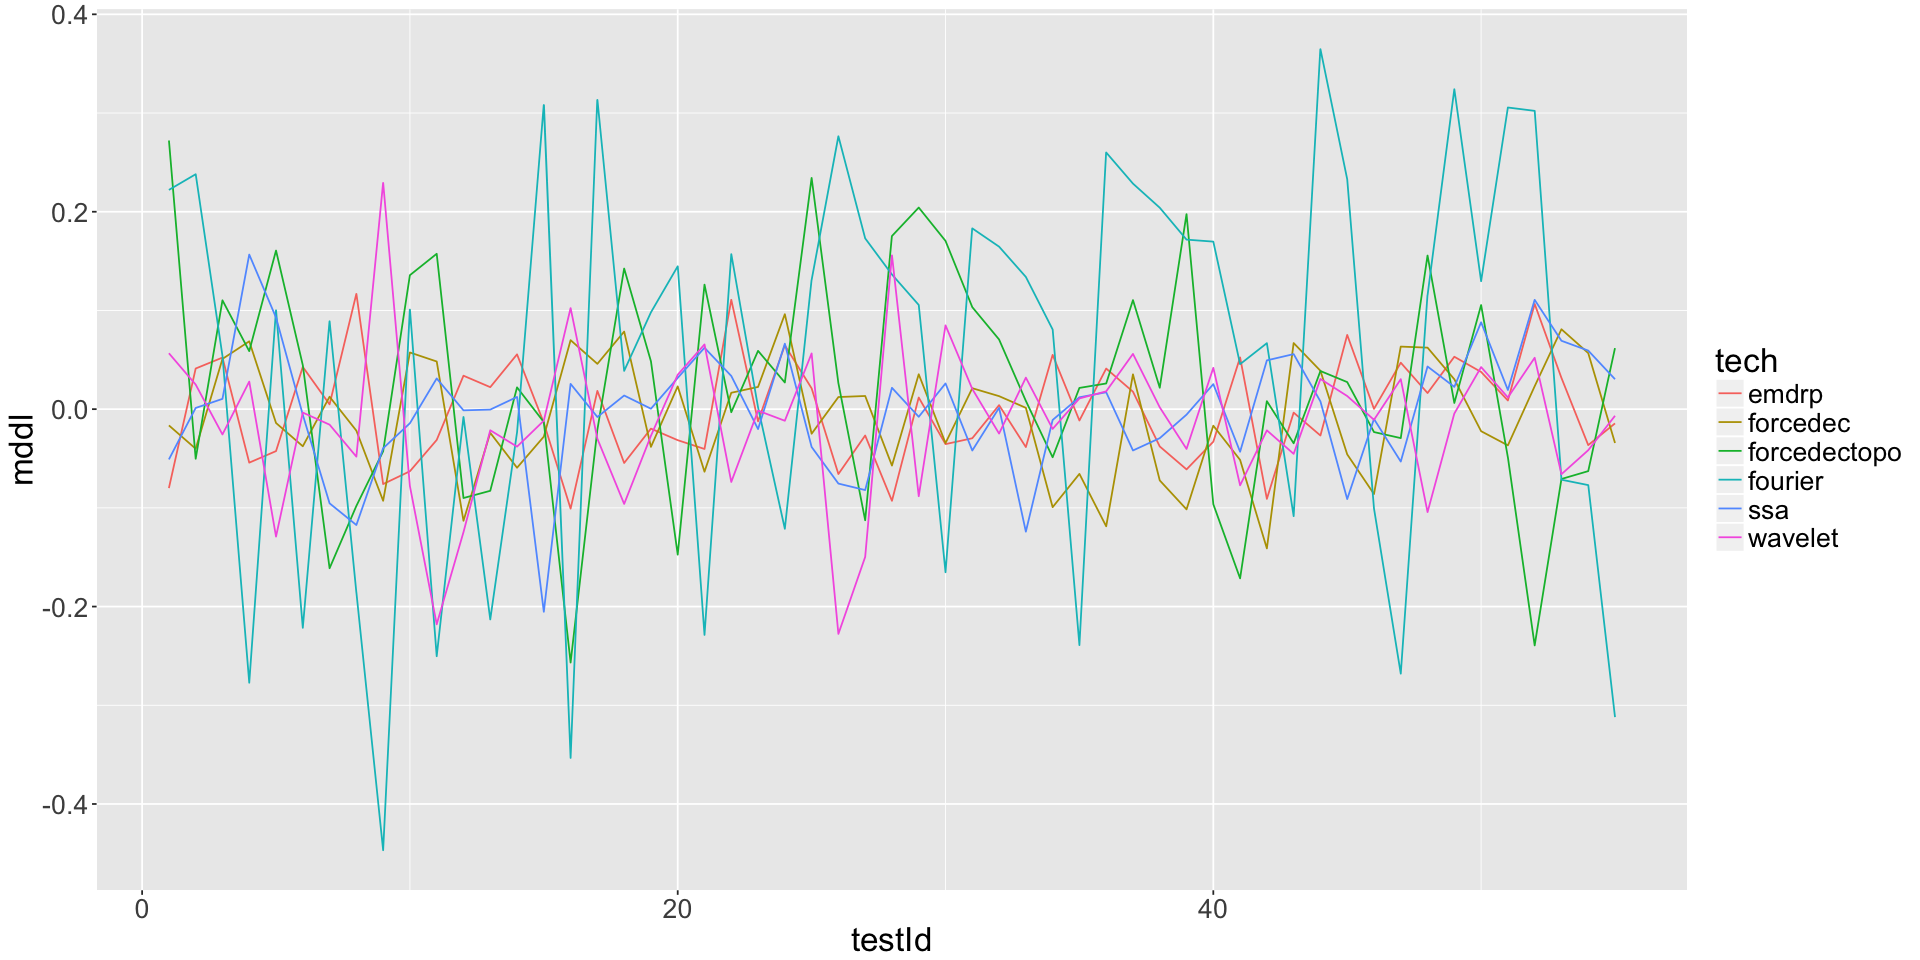

In [55]:

data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','mddl')])
ggplot(data, aes(x = testId, y = mddl, color = tech)) + geom_line() + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"result_mddl.pdf", sep='/'), width=16, height=5)

In [77]:
n = 'mddl'
m = matrix(unlist(lapply(listResult,function(x){cbind(unique(x$tech), mean(unlist(x[n])), sd(unlist(x[n])))})), ncol=3, byrow = T)
colnames(m)<-c('Tech', 'mean', 'sd')
m

Tech,mean,sd
fourier,0.0454583669013691,0.201474595015183
wavelet,-0.0124010679099549,0.0782435279783969
ssa,-0.000281505932922065,0.0612060413569067
emdrp,-0.00146580965542801,0.0521717066922704
forcedec,-0.00748202548487663,0.0580946836186978
forcedectopo,0.0224310674456497,0.114787676359706


pdf 
  2

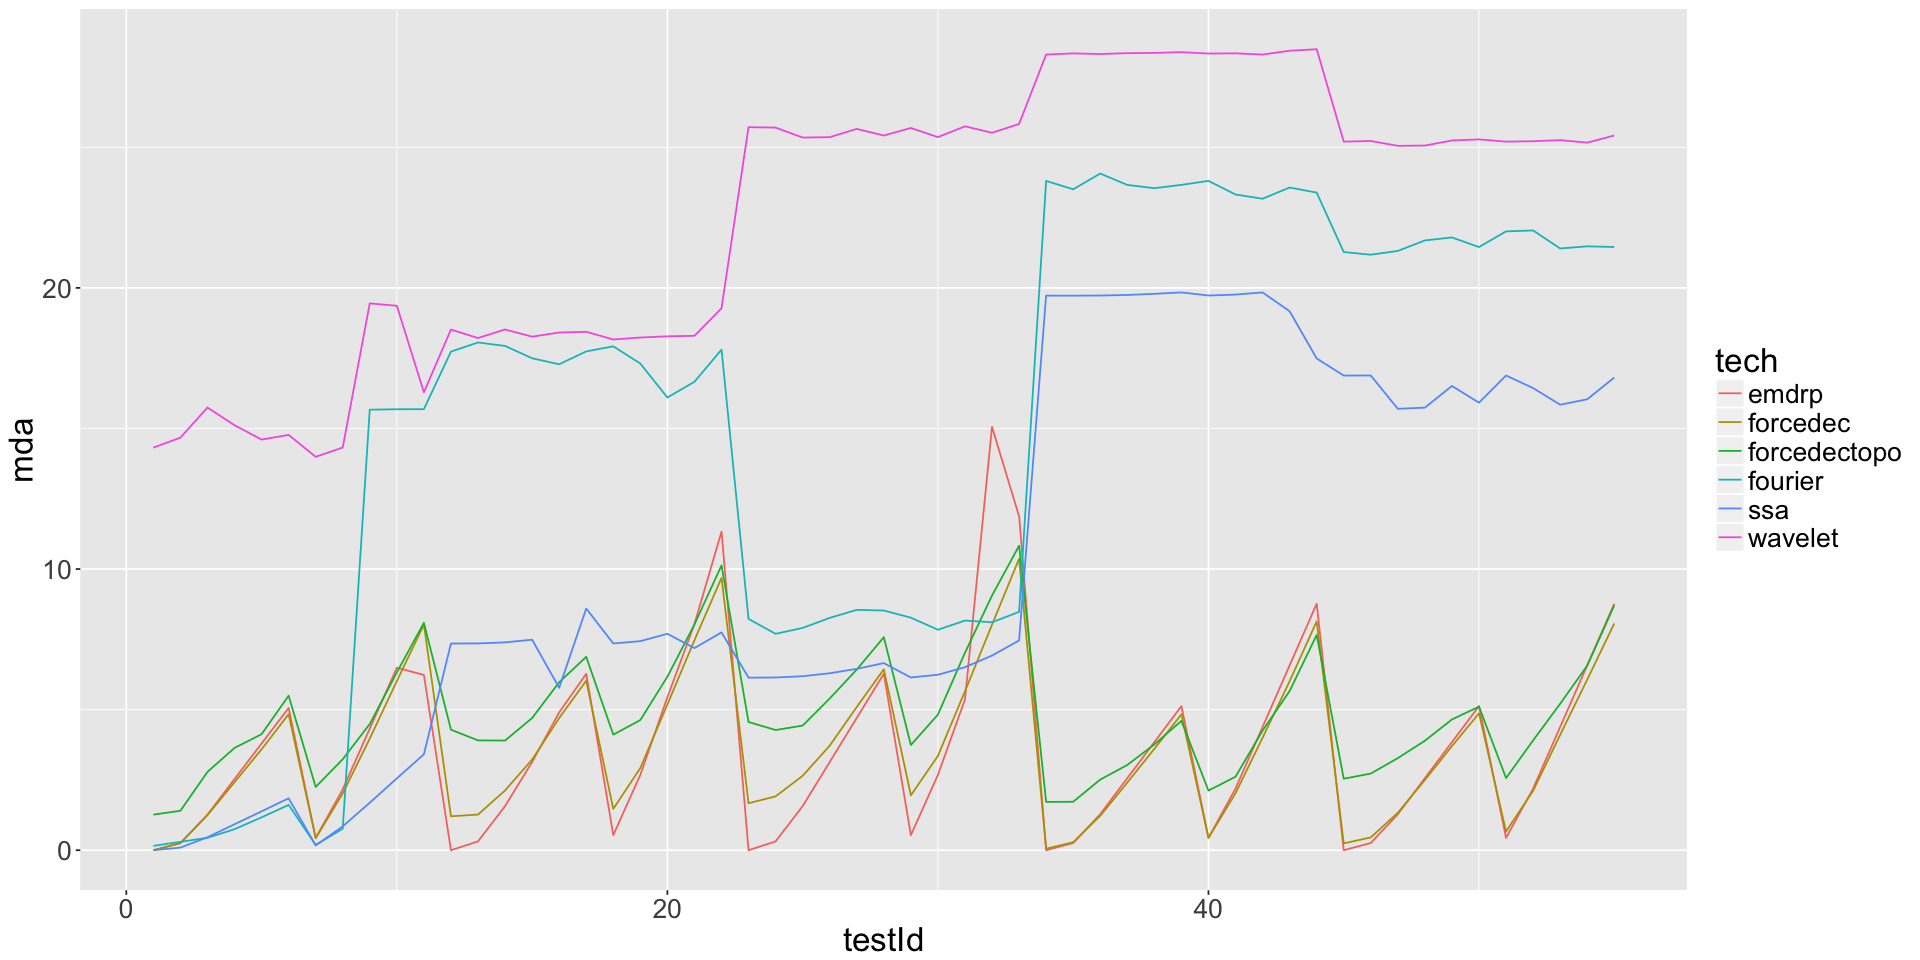

In [56]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','mda')])
ggplot(data, aes(x = testId, y = mda, color = tech)) + geom_line()  + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"result_mda.pdf", sep='/'), width=16, height=5)

In [76]:
n = 'mda'
m = matrix(unlist(lapply(listResult,function(x){cbind(unique(x$tech), mean(unlist(x[n])), sd(unlist(x[n])))})), ncol=3, byrow = T)
colnames(m)<-c('Tech', 'mean', 'sd')
m

Tech,mean,sd
fourier,15.1101411600918,8.06509457587455
wavelet,22.6516516040374,4.89356066290969
ssa,10.1835278879802,6.82864062956768
emdrp,3.62020438902022,3.34011671346141
forcedec,3.56381812550111,2.64633930566444
forcedectopo,4.77717949864929,2.19245618548093


pdf 
  2

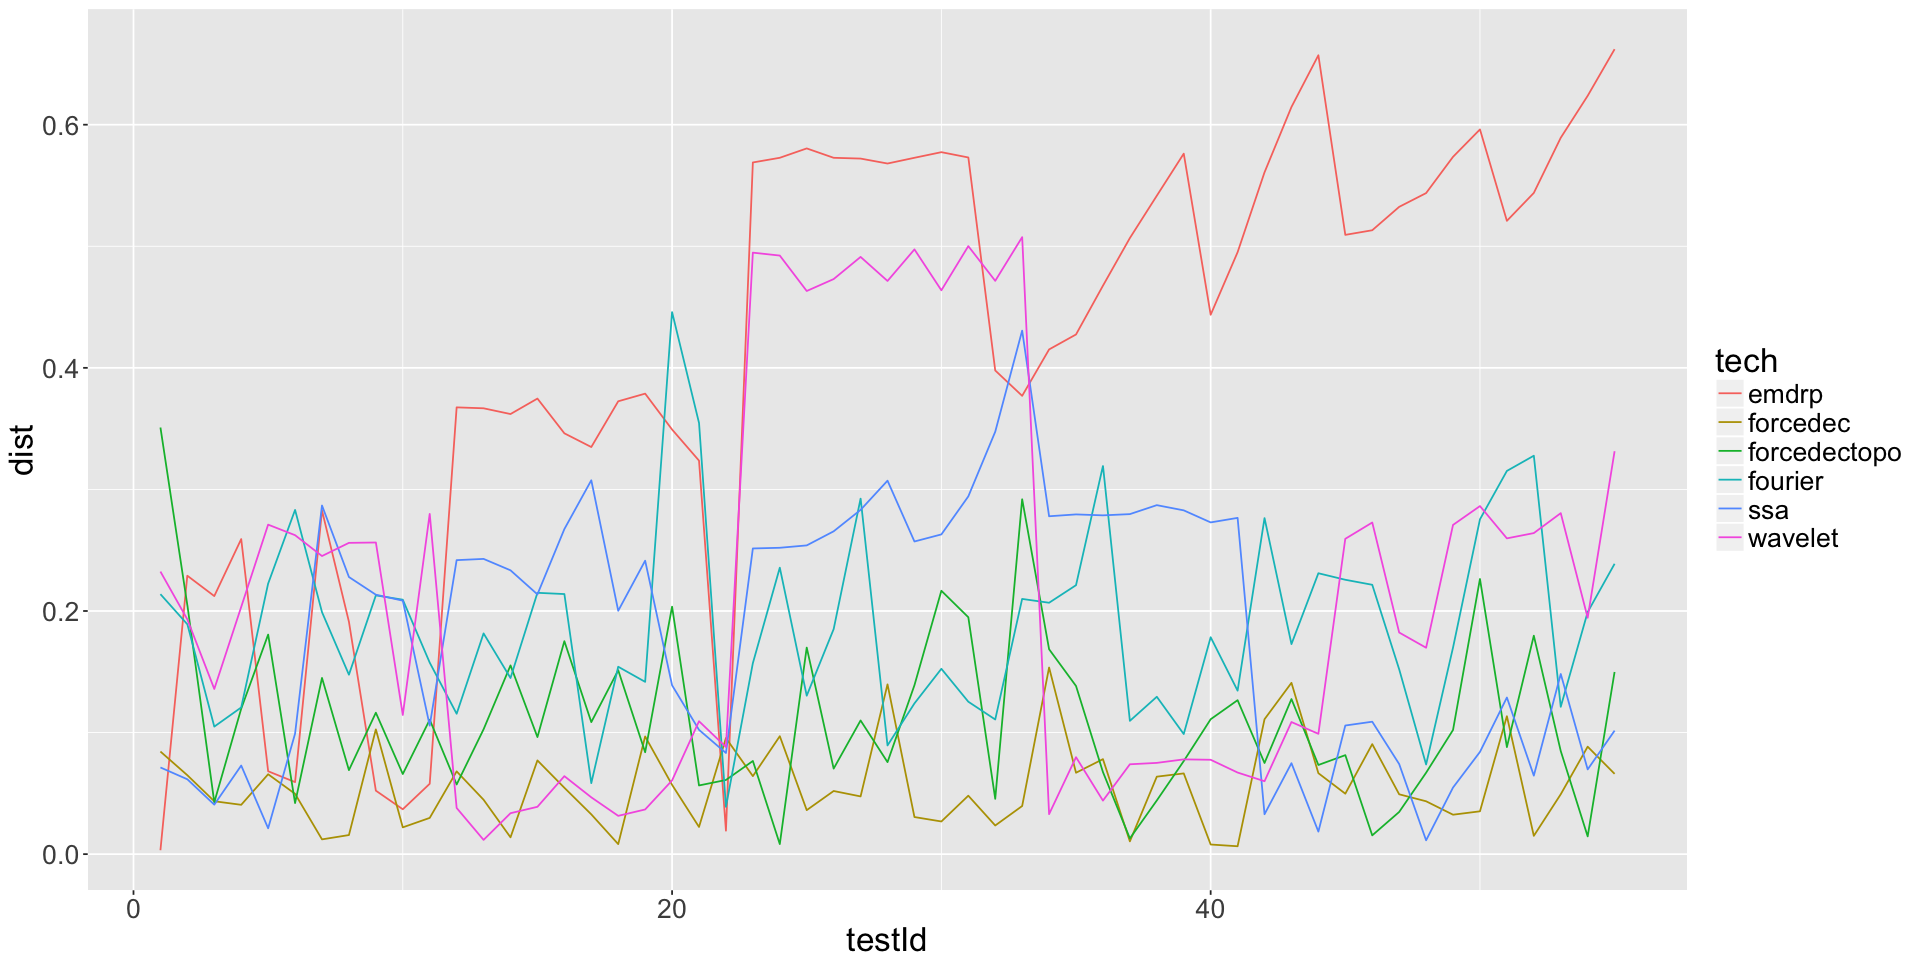

In [58]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','dist')])
p = ggplot(data, aes(x = testId, y = dist, color = tech)) + geom_line() + theme(text = element_text(size=20))
plot(p)    
dev.copy2pdf(file = paste(imagesFolder,"result_dist.pdf", sep='/'), width=16, height=5)

In [78]:
n = 'dist'
m = matrix(unlist(lapply(listResult,function(x){cbind(unique(x$tech), mean(unlist(x[n])), sd(unlist(x[n])))})), ncol=3, byrow = T)
colnames(m)<-c('Tech', 'mean', 'sd')
m

Tech,mean,sd
fourier,0.187925043028479,0.0782856019265255
wavelet,0.216425238115888,0.161175343970939
ssa,0.185464087892154,0.103621055009817
emdrp,0.416269638827609,0.185368177479167
forcedec,0.0565782314201329,0.0351692255327888
forcedectopo,0.112048886715258,0.0690771784758992


pdf 
  2

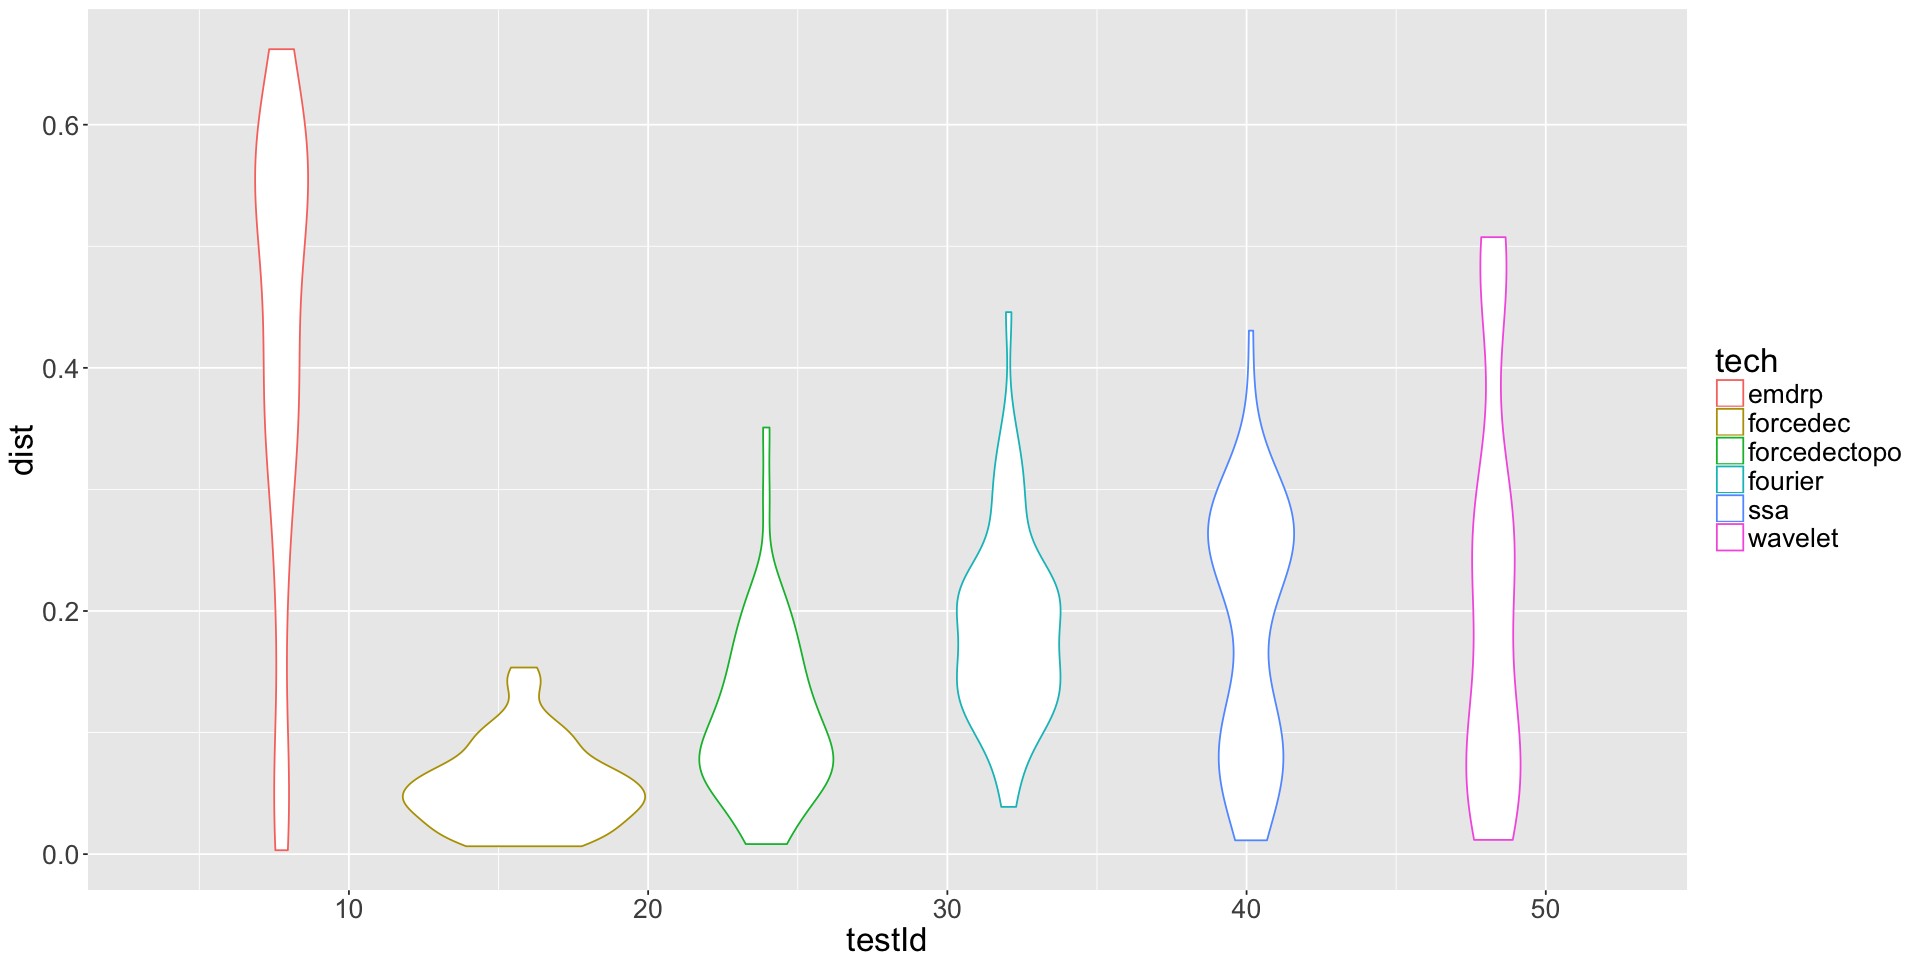

In [59]:
options(repr.plot.width=16, repr.plot.height=8)
data = data.frame()
for(i in 1:length(listResult)) data = rbind(data, listResult[[i]][c('testId','tech','dist')])
ggplot(data, aes(x = testId, y = dist, color = tech)) + geom_violin(scale = "area") + theme(text = element_text(size=20))
dev.copy2pdf(file = paste(imagesFolder,"result_dist_violin.pdf", sep='/'), width=16, height=5)